In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('c:/datasets/diabetess.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df = data.copy()

# Data Cleaning and Exploratory Analysis

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df_dups = df[df.duplicated()]
df_dups

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


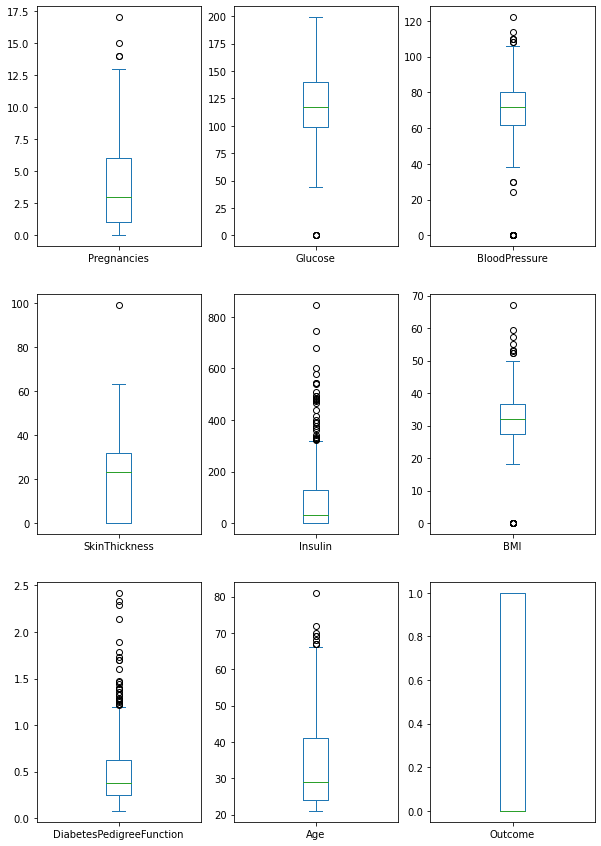

In [8]:
# Box and Whisker Plots - checking for outliers in the data
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

Inference:
    
    1. the data contains 9 features and 768 entries. All features are numeric(7 ints and 2 floats)
    2. there are no missing values in the data - no empty cells in the data
    3. there are no duplicates in the data.
    4. there are outliers in all of the inputs variables with 'insulin' and 'DiabetesPedigreeFunction' 
       being the variables with the highest number of outliers
    5. there are no mis-labels in the data because there are no categorical variables in the data

In [9]:
# Treatment for outliers using the inter-quartile range method
# Removing outliers in Pregnancies

Q1 = np.percentile(df['Pregnancies'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Pregnancies'], 75, interpolation = 'midpoint')

IQR = Q3-Q1
IQR

upper1 = Q3+1.5*IQR
lower1 = Q1-1.5*IQR

# Above Upper bound
upper = df['Pregnancies'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['Pregnancies'] <= (Q1-1.5*IQR)

print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Pregnancies, Length: 768, dtype: bool
(array([ 88, 159, 298, 455], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Pregnancies, Length: 768, dtype: bool
(array([], dtype=int64),)


In [10]:
IQR

5.0

In [11]:
upper1

13.5

In [12]:
lower1

-6.5

In [13]:
df = df.drop(df.index[[ 88, 159, 298, 455]])

In [14]:
# Removing outliers in Glucose using the inter-quartile range method

Q1 = np.percentile(df['Glucose'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Glucose'], 75, interpolation = 'midpoint')

IQR = Q3-Q1
IQR

upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

# Above Upper bound
upper = df['Glucose'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['Glucose'] <= (Q1-1.5*IQR)

print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Glucose, Length: 764, dtype: bool
(array([], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Glucose, Length: 764, dtype: bool
(array([ 75, 180, 339, 346, 498], dtype=int64),)


In [15]:
df = df.drop(df.index[[ 75, 180, 339, 346, 498]])

In [16]:
# Removing outliers in BloodPressure using the inter-quartile range method

Q1 = np.percentile(df['BloodPressure'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['BloodPressure'], 75, interpolation = 'midpoint')

IQR = Q3-Q1
IQR

upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

# Above Upper bound
upper = df['BloodPressure'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['BloodPressure'] <= (Q1-1.5*IQR)

print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BloodPressure, Length: 759, dtype: bool
(array([ 43,  83, 104, 174, 355, 540, 682], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BloodPressure, Length: 759, dtype: bool
(array([  7,  15,  18,  49,  60,  77,  80, 123, 169, 189, 218, 257, 262,
       265, 295, 327, 331, 341, 350, 419, 423, 428, 446, 460, 476, 486,
       513, 524, 526, 580, 588, 592, 595, 610, 634, 688, 694, 697],
      dtype=int64),)


In [17]:
df = df.drop(df.index[[ 43,  83, 104, 174, 355, 540, 682, 7,  15,  18,  49,  60,  77,  80, 123, 169, 189, 218, 257, 262,
       265, 295, 327, 331, 341, 350, 419, 423, 428, 446, 460, 476, 486,
       513, 524, 526, 580, 588, 592, 595, 610, 634, 688, 694, 697]])

In [18]:
# Removing outliers in SkinThickness using the inter-quartile range method

Q1 = np.percentile(df['SkinThickness'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['SkinThickness'], 75, interpolation = 'midpoint')

IQR = Q3-Q1
IQR

upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

# Above Upper bound
upper = df['SkinThickness'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['SkinThickness'] <= (Q1-1.5*IQR)

print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: SkinThickness, Length: 714, dtype: bool
(array([535], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: SkinThickness, Length: 714, dtype: bool
(array([], dtype=int64),)


In [19]:
df = df.drop(df.index[[535]])

In [20]:
# Removing outliers in Insulin using the inter-quartile range method

Q1 = np.percentile(df['Insulin'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Insulin'], 75, interpolation = 'midpoint')

IQR = Q3-Q1
IQR

upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

# Above Upper bound
upper = df['Insulin'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['Insulin'] <= (Q1-1.5*IQR)

print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Insulin, Length: 713, dtype: bool
(array([  7,  12,  49,  99, 140, 169, 202, 209, 212, 228, 229, 239, 264,
       274, 339, 361, 378, 384, 448, 530, 539, 594, 604, 643, 652, 655,
       660, 698], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Insulin, Length: 713, dtype: bool
(array([], dtype=int64),)


In [21]:
df = df.drop(df.index[[  7,  12,  49,  99, 140, 169, 202, 209, 212, 228, 229, 239, 264,
       274, 339, 361, 378, 384, 448, 530, 539, 594, 604, 643, 652, 655,
       660, 698]])

In [22]:
# Removing outliers in BMI using the inter-quartile range method

Q1 = np.percentile(df['BMI'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['BMI'], 75, interpolation = 'midpoint')

IQR = Q3-Q1
IQR

upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

# Above Upper bound
upper = df['BMI'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['BMI'] <= (Q1-1.5*IQR)

print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BMI, Length: 685, dtype: bool
(array([104, 137, 265, 393, 599], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BMI, Length: 685, dtype: bool
(array([  7, 128, 325, 610], dtype=int64),)


In [23]:
df = df.drop(df.index[[104, 137, 265, 393, 599, 7, 128, 325, 610]])

In [24]:
# Removing outliers in DiabetesPedigreeFunction using the inter-quartile range method

Q1 = np.percentile(df['DiabetesPedigreeFunction'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['DiabetesPedigreeFunction'], 75, interpolation = 'midpoint')

IQR = Q3-Q1
IQR

upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

# Above Upper bound
upper = df['DiabetesPedigreeFunction'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['DiabetesPedigreeFunction'] <= (Q1-1.5*IQR)

print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4       True
       ...  
763    False
764    False
765    False
766    False
767    False
Name: DiabetesPedigreeFunction, Length: 676, dtype: bool
(array([  4,   9,  33,  38,  49,  85, 127, 132, 160, 190, 211, 213, 224,
       253, 265, 287, 331, 342, 355, 466, 519, 529, 541, 543, 544, 578,
       580, 653, 659], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: DiabetesPedigreeFunction, Length: 676, dtype: bool
(array([], dtype=int64),)


In [25]:
df = df.drop(df.index[[  4,   9,  33,  38,  49,  85, 127, 132, 160, 190, 211, 213, 224,
       253, 265, 287, 331, 342, 355, 466, 519, 529, 541, 543, 544, 578,
       580, 653, 659]])

In [26]:
# Removing outliers in Age using the inter-quartile range method

Q1 = np.percentile(df['Age'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Age'], 75, interpolation = 'midpoint')

IQR = Q3-Q1
IQR

upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

# Above Upper bound
upper = df['Age'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['Age'] <= (Q1-1.5*IQR)

print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
5      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Age, Length: 647, dtype: bool
(array([ 99, 182, 297, 379, 406, 411, 448, 462, 558, 565, 638], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
5      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Age, Length: 647, dtype: bool
(array([], dtype=int64),)


In [27]:
df = df.drop(df.index[[ 99, 182, 297, 379, 406, 411, 448, 462, 558, 565, 638]])

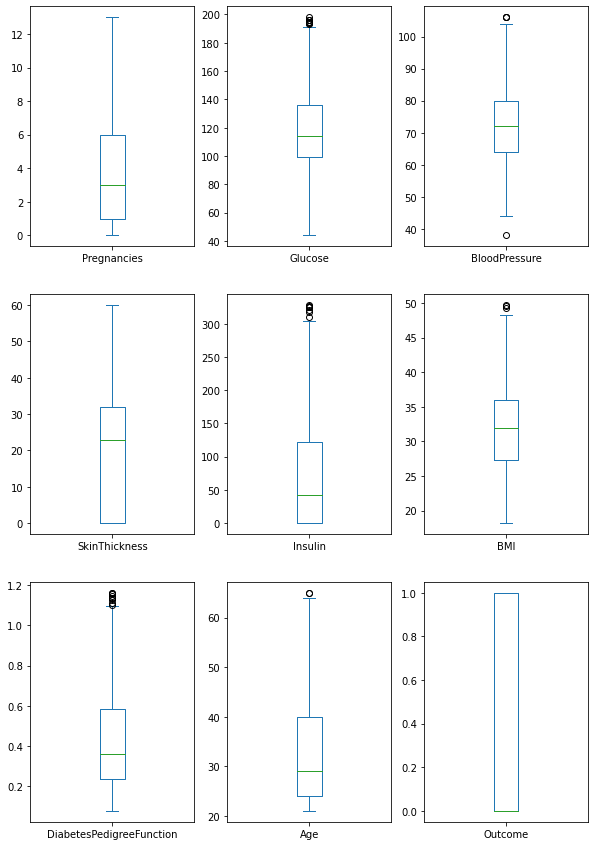

In [28]:
# Box and Whisker Plots - checking for outliers in the data after removal

df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

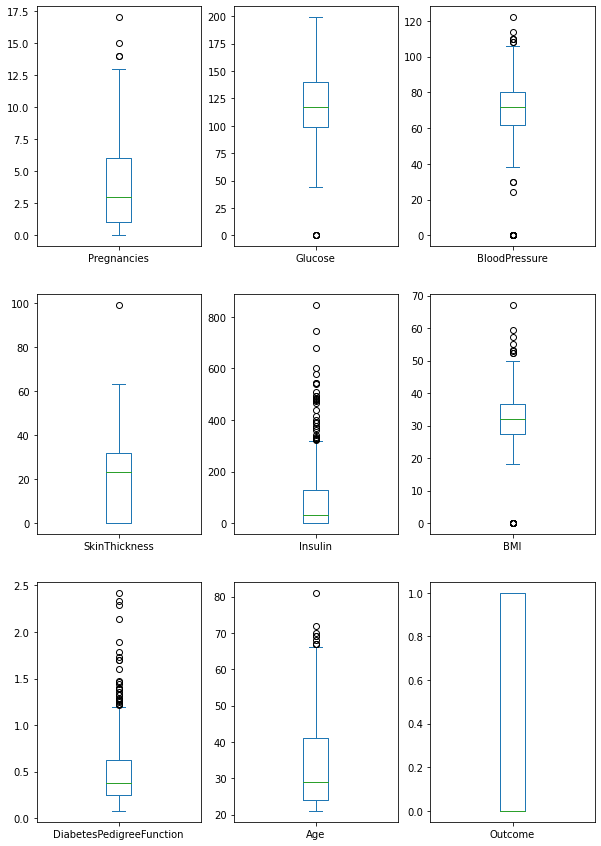

In [29]:
# Box and Whisker Plots - checking for outliers in the data
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

# Data Transformation and Preprocessing

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,636.0,3.786164,3.251388,0.000,1.00000,3.0000,6.000,13.000
Glucose,636.0,118.836478,28.981205,44.000,99.00000,114.0000,136.000,198.000
BloodPressure,636.0,72.014151,11.310010,38.000,64.00000,72.0000,80.000,106.000
SkinThickness,636.0,20.778302,15.274483,0.000,0.00000,23.0000,32.000,60.000
Insulin,636.0,68.844340,83.173773,0.000,0.00000,42.5000,122.000,328.000
BMI,636.0,31.994969,6.422311,18.200,27.30000,32.0000,36.025,49.700
DiabetesPedigreeFunction,636.0,0.425346,0.244421,0.078,0.23875,0.3595,0.583,1.162
Age,636.0,32.567610,10.873365,21.000,24.00000,29.0000,40.000,65.000
Outcome,636.0,0.311321,0.463398,0.000,0.00000,0.0000,1.000,1.000


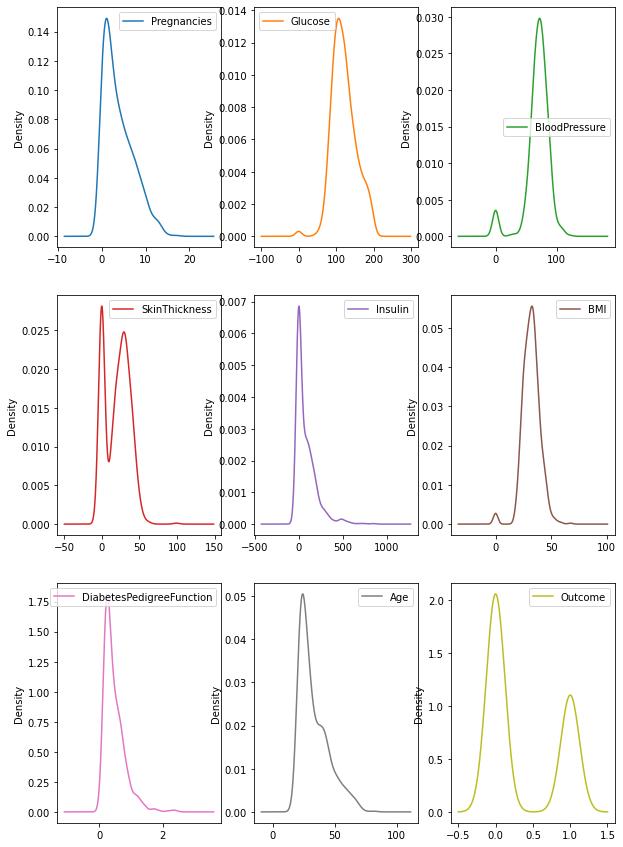

In [31]:
# Density Plots - checking the unclean/original data for normal or non-normal distribution for the purpose of comparison
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

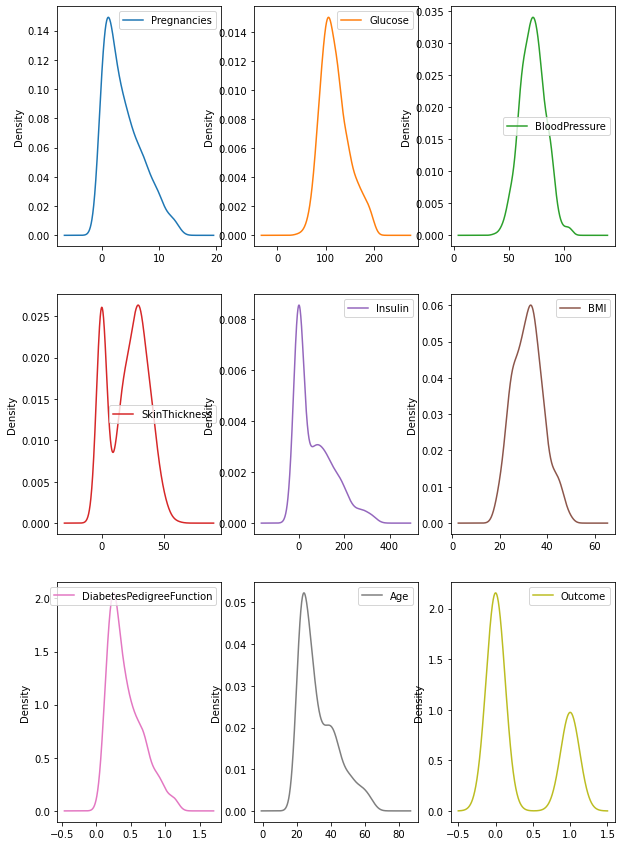

In [32]:
# checking the cleaned data for normal or non-normal distribution
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

Statistical Inference from the data:
    
     1. the scales across the features are very wide: recaling needed
     2. the standard deviation in the features is very high: requires standardization
     3. the distribution is not normal: normalization needed

# RESCALING

In [65]:
df.shape

(636, 9)

In [34]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [35]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
output = df['Outcome']

In [37]:
output

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 636, dtype: int64

In [63]:
# Rescaling data (between 0 and 1)

from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

df_arr = df.values

X = df_arr[:,0:8]
Y = df_arr[:,8]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_df = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaled_df)

[[0.46 0.68 0.5  ... 0.49 0.51 0.66]
 [0.08 0.27 0.41 ... 0.27 0.25 0.23]
 [0.62 0.9  0.38 ... 0.16 0.55 0.25]
 ...
 [0.38 0.5  0.5  ... 0.25 0.15 0.2 ]
 [0.08 0.53 0.32 ... 0.38 0.25 0.59]
 [0.08 0.32 0.47 ... 0.39 0.22 0.05]]


In [66]:
# Converting the rescaled X to a dataframe and adding back the Y
rescaled_df = pd.DataFrame(rescaled_df, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

print(rescaled_df)
rescaled_df['Outcome'] = df['Outcome']
print(rescaled_df)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.461538  0.675325       0.500000       0.583333  0.000000  0.488889   
1       0.076923  0.266234       0.411765       0.483333  0.000000  0.266667   
2       0.615385  0.902597       0.382353       0.000000  0.000000  0.161905   
3       0.076923  0.292208       0.411765       0.383333  0.286585  0.314286   
4       0.384615  0.467532       0.529412       0.000000  0.000000  0.234921   
..           ...       ...            ...            ...       ...       ...   
631     0.769231  0.370130       0.558824       0.800000  0.548780  0.466667   
632     0.153846  0.506494       0.470588       0.450000  0.000000  0.590476   
633     0.384615  0.500000       0.500000       0.383333  0.341463  0.253968   
634     0.076923  0.532468       0.323529       0.000000  0.000000  0.377778   
635     0.076923  0.318182       0.470588       0.516667  0.000000  0.387302   

     DiabetesPedigreeFunction       Age

In [40]:
rescaled_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.488889,0.506458,0.659091,1.0
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.266667,0.251845,0.227273,0.0
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.161905,0.547970,0.250000,1.0
3,0.076923,0.292208,0.411765,0.383333,0.286585,0.314286,0.082103,0.000000,0.0
4,0.384615,0.467532,0.529412,0.000000,0.000000,0.234921,0.113469,0.204545,NaN


In [41]:
rescaled_df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     111
dtype: int64

In [42]:
rescaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,636.0,0.291243,0.250107,0.0,0.076923,0.230769,0.461538,1.0
Glucose,636.0,0.485951,0.188190,0.0,0.357143,0.454545,0.597403,1.0
BloodPressure,636.0,0.500208,0.166324,0.0,0.382353,0.500000,0.617647,1.0
SkinThickness,636.0,0.346305,0.254575,0.0,0.000000,0.383333,0.533333,1.0
Insulin,636.0,0.209891,0.253579,0.0,0.000000,0.129573,0.371951,1.0
BMI,636.0,0.437936,0.203883,0.0,0.288889,0.438095,0.565873,1.0
DiabetesPedigreeFunction,636.0,0.320430,0.225481,0.0,0.148293,0.259686,0.465867,1.0
Age,636.0,0.262900,0.247122,0.0,0.068182,0.181818,0.431818,1.0
Outcome,525.0,0.302857,0.459932,0.0,0.000000,0.000000,1.000000,1.0


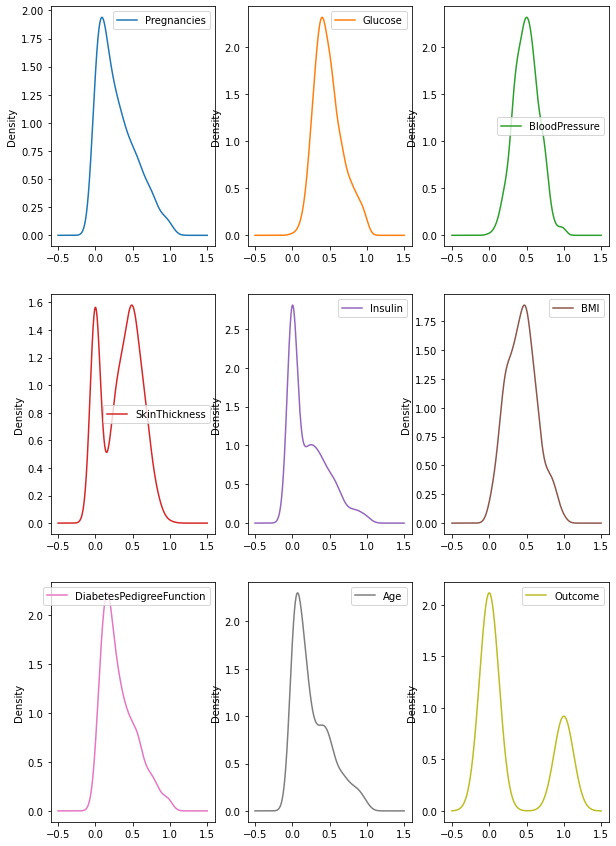

In [43]:
# checking the rescaled data for normal or non-normal distribution
rescaled_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

# STANDARDIZING THE RESCALED DATA

In [44]:
# CONTINUING TRANSFORMATION USING THE OUTCOME FROM THE RESCALING TRANSFORMATION STAGE

from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

rescaled_df_arr = rescaled_df.values

X = rescaled_df_arr[:,0:8]
Y = rescaled_df_arr[:,8]

scaler = StandardScaler().fit(X)
rescaled_df_std = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaled_df_std)

# converting the rescaled X to a dataframe and adding back Y

rescaled_std = pd.DataFrame(rescaled_df_std, columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

# adding back the outcome column
print(rescaled_std)
rescaled_std['Outcome'] = rescaled_df['Outcome']
print(rescaled_std)

[[ 6.814e-01  1.007e+00 -1.252e-03 ...  2.501e-01  8.257e-01  1.604e+00]
 [-8.576e-01 -1.168e+00 -5.322e-01 ... -8.407e-01 -3.044e-01 -1.443e-01]
 [ 1.297e+00  2.216e+00 -7.091e-01 ... -1.355e+00  1.010e+00 -5.224e-02]
 ...
 [ 3.736e-01  7.471e-02 -1.252e-03 ... -9.030e-01 -7.384e-01 -2.363e-01]
 [-8.576e-01  2.474e-01 -1.063e+00 ... -2.953e-01 -3.126e-01  1.328e+00]
 [-8.576e-01 -8.922e-01 -1.782e-01 ... -2.485e-01 -4.518e-01 -8.806e-01]]
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.681426  1.007083      -0.001252       0.931808 -0.828368  0.250112   
1      -0.857590 -1.168451      -0.532173       0.538687 -0.828368 -0.840697   
2       1.297032  2.215713      -0.709147      -1.361398 -0.828368 -1.354935   
3      -0.857590 -1.030322      -0.532173       0.145566  0.302685 -0.606952   
4       0.373623 -0.097950       0.175722      -1.361398 -0.828368 -0.996526   
..           ...       ...            ...            ...       ...       ...

In [45]:
rescaled_std.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.681426,1.007083,-0.001252,0.931808,-0.828368,0.250112,0.825677,1.604481,1.0
1,-0.857590,-1.168451,-0.532173,0.538687,-0.828368,-0.840697,-0.304411,-0.144283,0.0
2,1.297032,2.215713,-0.709147,-1.361398,-0.828368,-1.354935,1.009930,-0.052243,1.0
3,-0.857590,-1.030322,-0.532173,0.145566,0.302685,-0.606952,-1.057802,-1.064686,0.0
4,0.373623,-0.097950,0.175722,-1.361398,-0.828368,-0.996526,-0.918589,-0.236323,NaN


In [46]:
rescaled_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,636.0,7.610963e-17,1.000787,-1.165393,-0.857590,-0.241984,0.681426,2.836047
Glucose,636.0,-1.859100e-16,1.000787,-2.584274,-0.684999,-0.167015,0.592696,2.733697
BloodPressure,636.0,1.470696e-16,1.000787,-3.009805,-0.709147,-0.001252,0.706643,3.007300
SkinThickness,636.0,-1.393016e-16,1.000787,-1.361398,-1.361398,0.145566,0.735248,2.569813
Insulin,636.0,1.466332e-17,1.000787,-0.828368,-0.828368,-0.316988,0.639595,3.118286
BMI,636.0,-1.914524e-16,1.000787,-2.149666,-0.731616,0.000784,0.627999,2.758970
DiabetesPedigreeFunction,636.0,-1.869574e-16,1.000787,-1.422215,-0.764021,-0.269607,0.645518,3.016245
Age,636.0,9.775549e-18,1.000787,-1.064686,-0.788565,-0.328364,0.684079,2.985085
Outcome,525.0,3.028571e-01,0.459932,0.000000,0.000000,0.000000,1.000000,1.000000


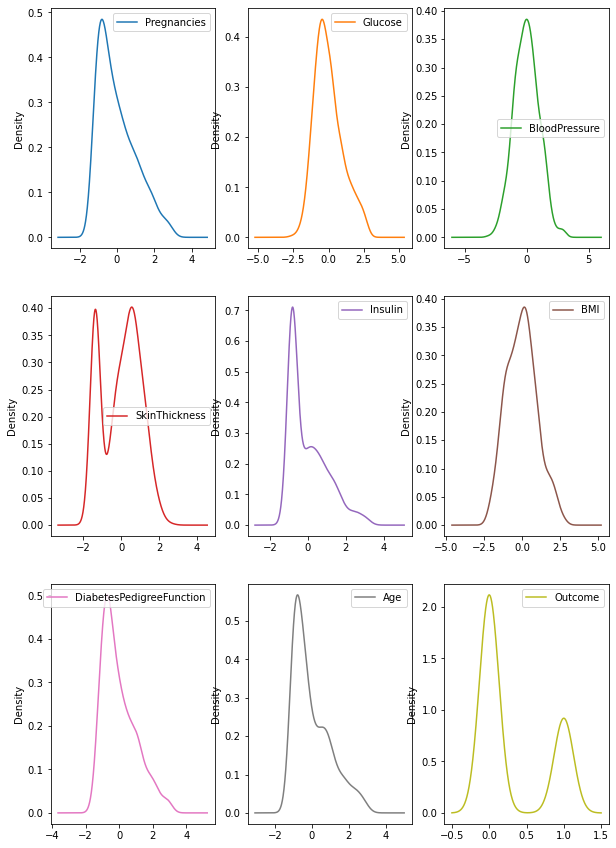

In [47]:
# checking the rescaled.std data for normal or non-normal distribution
rescaled_std.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

# IMPLEMENTING NORMALIZATION ON THE RESCALED AND STANDARDIZED DATA

In [48]:
#rescaled_std.fillna({'Outcome': 1}, inplace = True)

In [49]:
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

rescaled_std_arr = rescaled_std.values

X = rescaled_std_arr[:,0:8]
Y = rescaled_std_arr[:,8]

scaler = Normalizer().fit(X)
normalized_df = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalized_df)

# converting the normalized_df to a dataframe and adding back Y
normalized_df_R_S_N = pd.DataFrame(normalized_df, columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# adding back the outcome column
print(normalized_df_R_S_N)
normalized_df_R_S_N['Outcome'] = data['Outcome']
print(normalized_df_R_S_N)

[[ 2.704e-01  3.996e-01 -4.968e-04 ...  9.924e-02  3.276e-01  6.366e-01]
 [-4.194e-01 -5.715e-01 -2.603e-01 ... -4.112e-01 -1.489e-01 -7.057e-02]
 [ 3.670e-01  6.269e-01 -2.006e-01 ... -3.833e-01  2.857e-01 -1.478e-02]
 ...
 [ 2.745e-01  5.489e-02 -9.200e-04 ... -6.635e-01 -5.425e-01 -1.736e-01]
 [-3.386e-01  9.766e-02 -4.197e-01 ... -1.166e-01 -1.234e-01  5.244e-01]
 [-4.435e-01 -4.614e-01 -9.217e-02 ... -1.285e-01 -2.336e-01 -4.554e-01]]
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.270380  0.399596      -0.000497       0.369728 -0.328685  0.099241   
1      -0.419432 -0.571468      -0.260276       0.263462 -0.405140 -0.411170   
2       0.366963  0.626881      -0.200636      -0.385174 -0.234366 -0.383345   
3      -0.390868 -0.469594      -0.242551       0.066345  0.137956 -0.276633   
4       0.173968 -0.045608       0.081821      -0.633903 -0.385710 -0.464009   
..           ...       ...            ...            ...       ...       ...

In [50]:
normalized_df_R_S_N

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.270380,0.399596,-0.000497,0.369728,-0.328685,0.099241,0.327617,0.636635,1
1,-0.419432,-0.571468,-0.260276,0.263462,-0.405140,-0.411170,-0.148882,-0.070566,0
2,0.366963,0.626881,-0.200636,-0.385174,-0.234366,-0.383345,0.285735,-0.014781,1
3,-0.390868,-0.469594,-0.242551,0.066345,0.137956,-0.276633,-0.482119,-0.485257,0
4,0.173968,-0.045608,0.081821,-0.633903,-0.385710,-0.464009,-0.427719,-0.110038,1
...,...,...,...,...,...,...,...,...,...
631,0.449790,-0.144848,0.082942,0.419437,0.314531,0.033166,-0.244909,0.658704,0
632,-0.375502,0.074613,-0.121727,0.278421,-0.565772,0.511404,-0.238673,-0.349997,0
633,0.274500,0.054890,-0.000920,0.106947,0.381507,-0.663454,-0.542524,-0.173627,0
634,-0.338572,0.097662,-0.419705,-0.537474,-0.327036,-0.116580,-0.123413,0.524430,0


In [51]:
normalized = normalized_df_R_S_N.copy()

In [52]:
normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,636.0,-0.025588,0.348216,-0.789556,-0.308271,-0.100972,0.245668,0.849826
Glucose,636.0,-0.029106,0.354276,-0.827087,-0.285968,-0.072925,0.213772,0.916464
BloodPressure,636.0,-0.020132,0.353537,-0.933833,-0.285066,-0.000603,0.237485,0.849410
SkinThickness,636.0,0.003365,0.366355,-0.782670,-0.356720,0.075062,0.296940,0.806683
Insulin,636.0,-0.013985,0.349718,-0.581575,-0.299973,-0.130714,0.263251,0.918639
BMI,636.0,-0.019382,0.352323,-0.896198,-0.302442,0.000359,0.230274,0.844808
DiabetesPedigreeFunction,636.0,-0.021802,0.353191,-0.791945,-0.295698,-0.109676,0.243270,0.920283
Age,636.0,-0.040808,0.346106,-0.649893,-0.322521,-0.134910,0.233620,0.885155
Outcome,636.0,0.342767,0.475008,0.000000,0.000000,0.000000,1.000000,1.000000


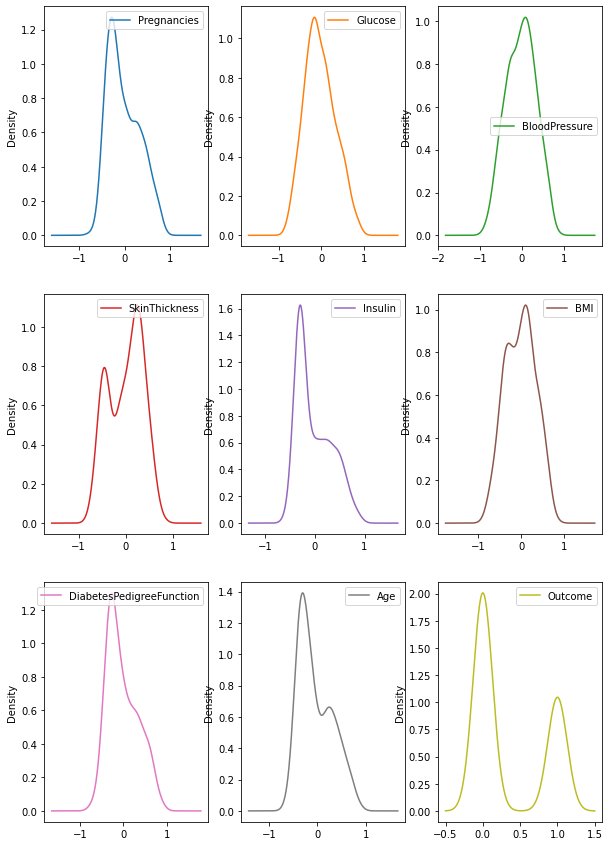

In [53]:
# checking the rescaled, standardized and normalized data for normal or non-normal distribution
normalized.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

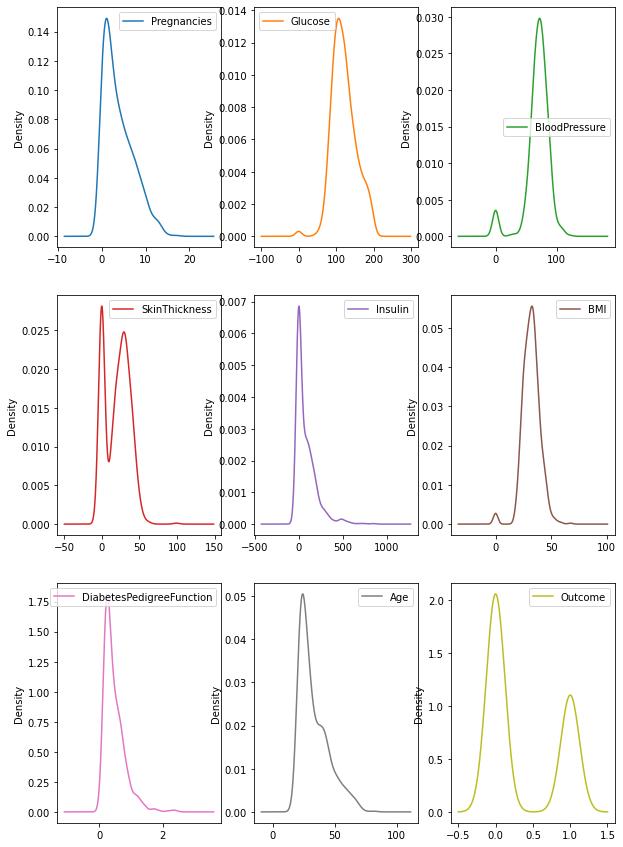

In [54]:
# checking the original data for normal or non-normal distribution
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

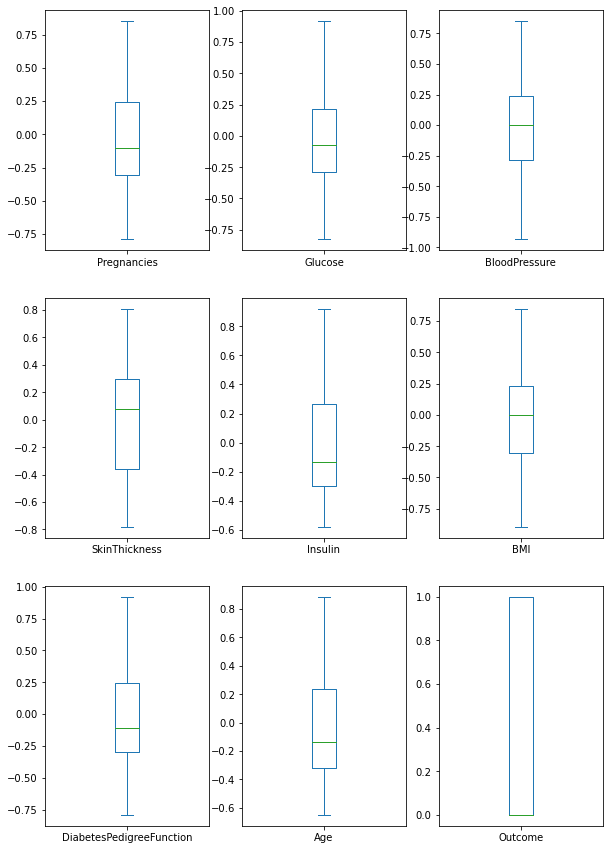

In [55]:
# checking the rescaled, standardized and normalized data for normal or non-normal distribution using boxplot
normalized.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

In [56]:
normalized.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Feature Selection using RFE

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

normalized_arr = normalized.values
X = normalized_arr[:, :8]
Y = normalized_arr[:,8]

model = LogisticRegression(max_iter=500)
feature_select = RFE(model, n_features_to_select=4)
fit = feature_select.fit(X,Y)
print(fit.support_)
print(fit.ranking_)

[False  True False  True  True False  True False]
[5 1 4 1 1 3 1 2]


In [58]:
normalized.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [59]:
X = normalized[['Glucose','SkinThickness','Insulin','DiabetesPedigreeFunction']]
Y = normalized.Outcome.values

model = LogisticRegression(max_iter=500)
model.fit(X,Y)
model.score(X,Y)

0.6572327044025157

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data_arr = data.values
X = data_arr[:, :8]
Y = data_arr[:,8]

model = LogisticRegression(max_iter=500)
feature_select = RFE(model, n_features_to_select=4)
fit = feature_select.fit(X,Y)
print(fit.support_)
print(fit.ranking_)

[ True  True False False False  True  True False]
[1 1 3 5 4 1 1 2]


In [61]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [62]:
X = data[['Pregnancies', 'Glucose','BMI', 'DiabetesPedigreeFunction']]
Y = data.Outcome.values

model = LogisticRegression(max_iter=500)
model.fit(X,Y)
model.score(X,Y)

0.76953125